<a href="https://colab.research.google.com/github/muralivakada/INSE-6220---Project/blob/main/INSE_6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [2]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

*Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The goal of this study was to see how well some machine learning algorithms predicted the occurrence of Lumpy Skin Disease (LSD) infection in cattle based on meteorological data obtained from University of East Anglia’s Climatic Research Unit, and Elevation data obtained from Natural Earth database. Using these methods could be extremely beneficial in conducting screening and awareness programmes, as well as taking preventive measures such as Vaccination in areas where the risk of LSD infection is high.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, six mateorological parameters, and one Elevation parameter is considered:

1. Cloud Cover (CC in %),
2. Driunal Temparature (DT in degree celcius),
3. Frost Day Frequency (FF days per month),
4. Potential Evapotranspiration (ET in mm per day),
5. Vapor Pressure (VP in hPa), 
6. Wet Day Frequency (WDF in days)
7. Elevation (EVLT in metres)



https://www.kaggle.com/datasets/saurabhshahane/lumpy-skin-disease-dataset

In [5]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/muralivakada/INSE-6220---Project/main/INSE6220%20Project%20Dataset')
df.head(25)

CC   DT     FF   ET    VP    WDF  EVT  LUMPY
0   45.4  8.7   0.00  3.6  10.4  10.67  163      1
1   80.4  6.6  25.78  0.7   4.1   8.19  135      1
2   80.4  6.6  25.78  0.7   4.1   8.19  135      1
3   80.4  6.6  25.78  0.7   4.1   8.19  135      1
4   80.4  6.6  25.78  0.7   4.1   8.19  135      1
5   80.4  6.6  25.78  0.7   4.1   8.19  135      1
6   82.8  6.5  25.15  0.6   4.6   8.24  174      1
7   82.8  6.5  25.15  0.6   4.6   8.24  174      1
8   77.6  7.1  25.57  0.5   4.6   9.26  148      1
9   77.6  7.1  25.57  0.5   4.6   9.26  148      1
10  82.3  6.7  24.49  0.5   5.2   8.33  154      1
11  80.4  6.6  25.78  0.7   4.1   8.19  135      1
12  82.4  6.3  26.58  0.7   3.8   9.55  176      1
13  80.4  6.6  25.78  0.7   4.1   8.19  135      1
14  80.4  6.6  25.78  0.7   4.1   8.19  135      1
15  80.4  6.6  25.78  0.7   4.1   8.19  135      1
16  80.4  6.6  25.78  0.7   4.1   8.19  135      1
17  80.4  6.6  25.78  0.7   4.1   8.19  135      1
18  80.4  6.6  25.78  0.7   4.1   8.19  135      1
19  80.4  6.6  25.78  0.7   4.1   8.19  135      1
20  80.4  6.6  25.78  0.7   4.1   8.19  135      1
21  80.4  6.6  25.78  0.7   4.1   8.19  135      1
22  80.4  6.6  25.78  0.7   4.1   8.19  135      1
23  82.4  6.3  26.58  0.7   3.8   9.55  176      1
24  79.7  7.0  25.25  0.6   4.7  10.15  184      1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CC      1000 non-null   float64
 1   DT      1000 non-null   float64
 2   FF      1000 non-null   float64
 3   ET      1000 non-null   float64
 4   VP      1000 non-null   float64
 5   WDF     1000 non-null   float64
 6   EVT     1000 non-null   int64  
 7   LUMPY   1000 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  509


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

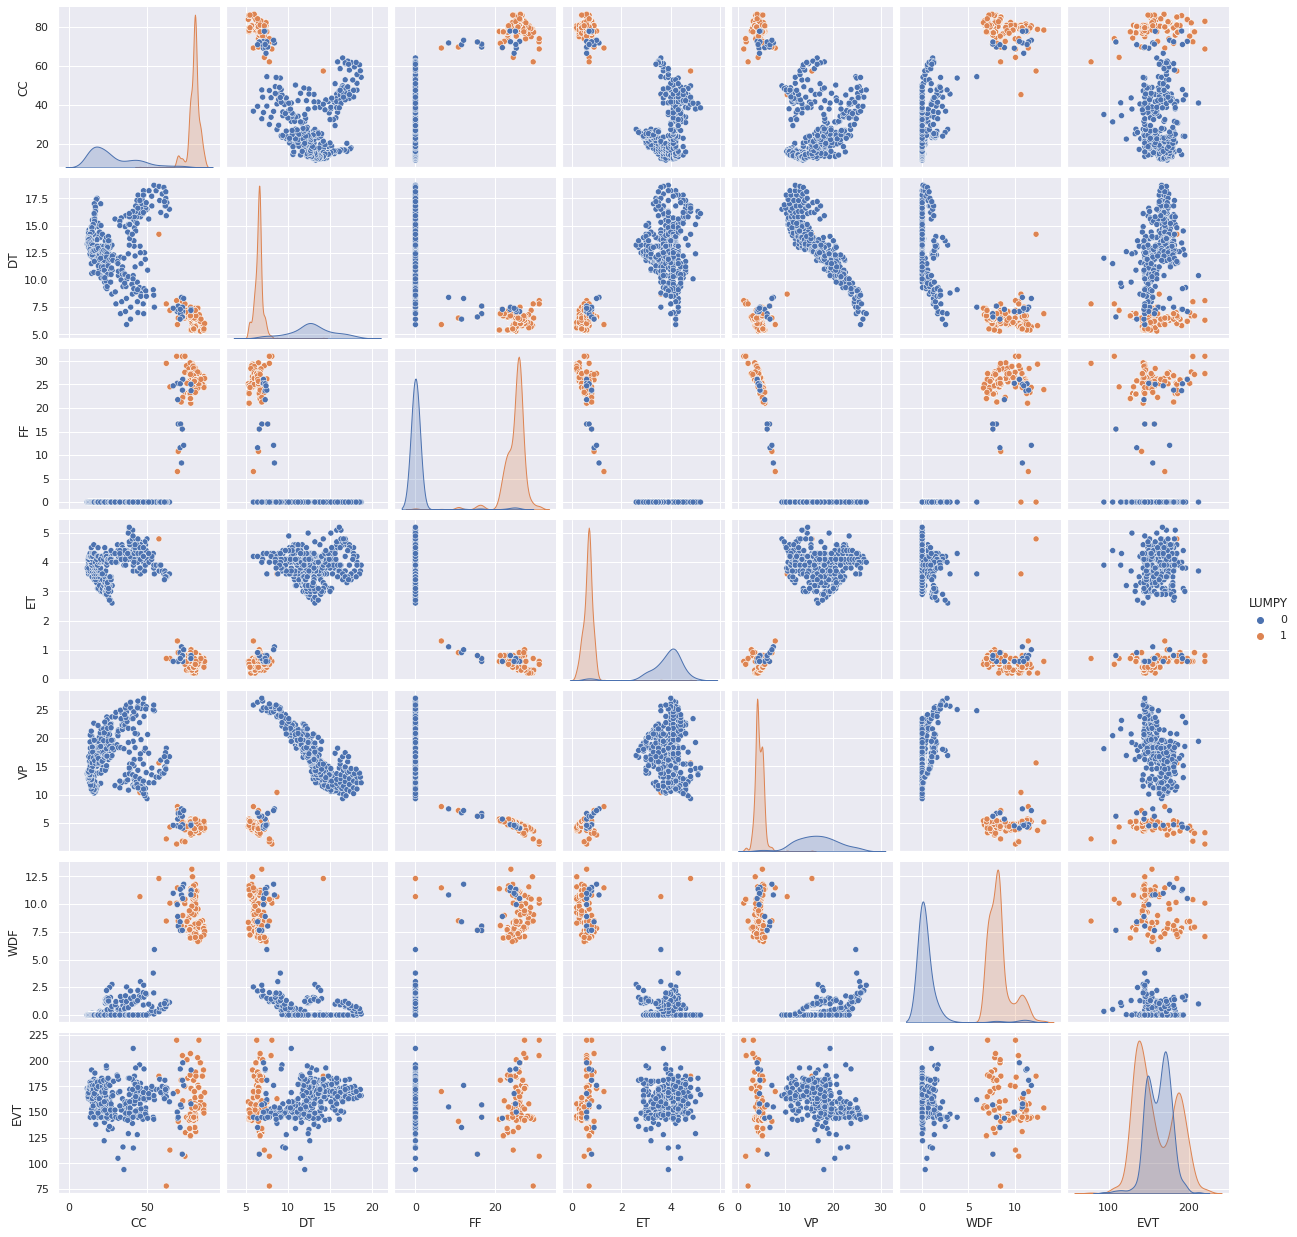

In [9]:
sns.pairplot(df, hue='LUMPY')
plt.show()

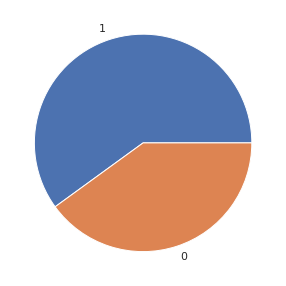

In [10]:
y =df['LUMPY']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [11]:
X = df.drop(columns=['LUMPY'])
X.head(10)

CC   DT     FF   ET    VP    WDF  EVT
0  45.4  8.7   0.00  3.6  10.4  10.67  163
1  80.4  6.6  25.78  0.7   4.1   8.19  135
2  80.4  6.6  25.78  0.7   4.1   8.19  135
3  80.4  6.6  25.78  0.7   4.1   8.19  135
4  80.4  6.6  25.78  0.7   4.1   8.19  135
5  80.4  6.6  25.78  0.7   4.1   8.19  135
6  82.8  6.5  25.15  0.6   4.6   8.24  174
7  82.8  6.5  25.15  0.6   4.6   8.24  174
8  77.6  7.1  25.57  0.5   4.6   9.26  148
9  77.6  7.1  25.57  0.5   4.6   9.26  148

In [12]:
X.describe().transpose()

count       mean        std   min    25%     50%      75%     max
CC   1000.0   59.25470  26.963078  11.8   27.0   77.50   80.400   86.60
DT   1000.0    9.01660   3.508078   5.3    6.5    6.70   12.225   18.70
FF   1000.0   15.14919  12.270014   0.0    0.0   23.09   25.780   31.00
ET   1000.0    1.91790   1.624589   0.2    0.6    0.80    3.800    5.20
VP   1000.0    9.38120   6.610301   1.3    4.1    5.20   15.200   27.00
WDF  1000.0    5.25913   4.073184   0.0    0.0    7.26    8.190   13.14
EVT  1000.0  160.00200  21.641912  78.0  144.0  157.00  176.000  220.00

**Standardize the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

CC        DT        FF        ET        VP       WDF       EVT
0 -0.514097 -0.090294 -1.235269  1.035919  0.154200  1.329078  0.138597
1  0.784624 -0.689212  0.866839 -0.750042 -0.799335  0.719913 -1.155836
2  0.784624 -0.689212  0.866839 -0.750042 -0.799335  0.719913 -1.155836
3  0.784624 -0.689212  0.866839 -0.750042 -0.799335  0.719913 -1.155836
4  0.784624 -0.689212  0.866839 -0.750042 -0.799335  0.719913 -1.155836
5  0.784624 -0.689212  0.866839 -0.750042 -0.799335  0.719913 -1.155836
6  0.873679 -0.717732  0.815469 -0.811627 -0.723657  0.732194  0.647124
7  0.873679 -0.717732  0.815469 -0.811627 -0.723657  0.732194  0.647124
8  0.680726 -0.546612  0.849716 -0.873211 -0.723657  0.982738 -0.554850
9  0.680726 -0.546612  0.849716 -0.873211 -0.723657  0.982738 -0.554850

In [14]:
X.describe().transpose()

count          mean     std       min       25%       50%       75%  \
CC   1000.0  6.348255e-16  1.0005 -1.760869 -1.196853  0.677016  0.784624   
DT   1000.0  2.591483e-15  1.0005 -1.059971 -0.717732 -0.660692  0.915033   
FF   1000.0 -4.941603e-16  1.0005 -1.235269 -1.235269  0.647496  0.866839   
ET   1000.0  1.398992e-15  1.0005 -1.057966 -0.811627 -0.688457  1.159088   
VP   1000.0 -8.788525e-16  1.0005 -1.223128 -0.799335 -0.632844  0.880703   
WDF  1000.0  2.935874e-15  1.0005 -1.291806 -1.291806  0.491476  0.719913   
EVT  1000.0 -1.948997e-16  1.0005 -3.790933 -0.739769 -0.138782  0.739584   

          max  
CC   1.014683  
DT   2.761696  
FF   1.292479  
ET   2.021276  
VP   2.666689  
WDF  1.935786  
EVT  2.773693

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

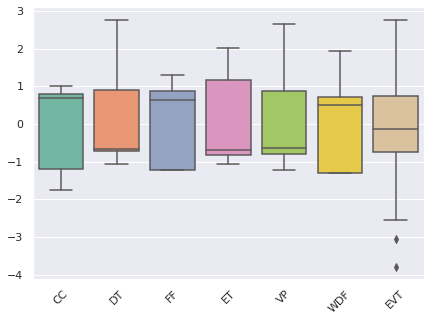

In [16]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

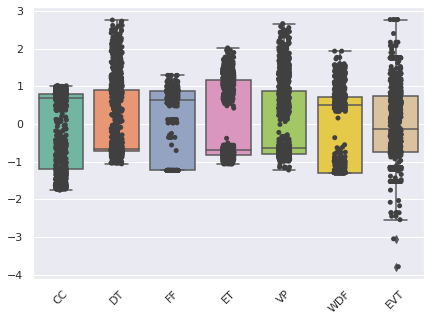

In [17]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

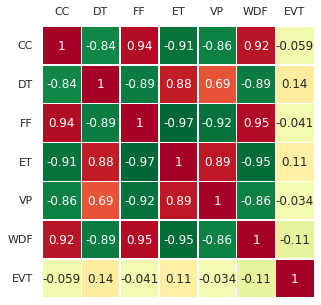

In [18]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

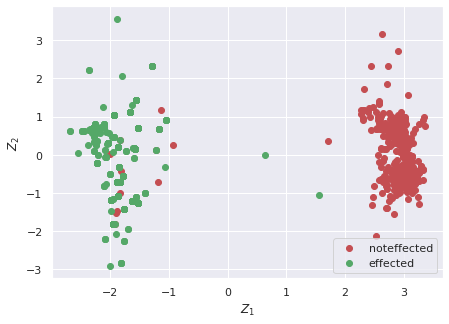

In [19]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(noteffected)->0,  2(effected)->1
idx_noteffected = np.where(y == 0)
idx_effected = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_noteffected,0], Z[idx_noteffected,1], c='r', label='noteffected')
plt.scatter(Z[idx_effected,0], Z[idx_effected,1], c='g', label='effected')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

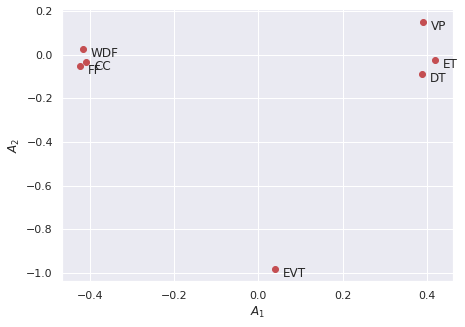

In [20]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(8, 2), textcoords='offset points', ha='left', va='top')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


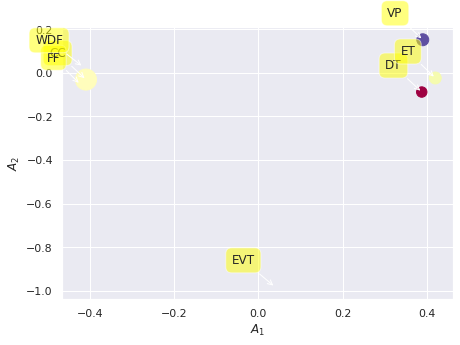

In [21]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

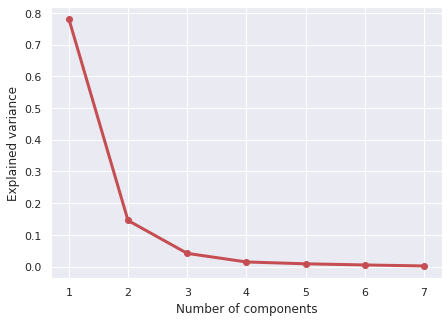

In [22]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

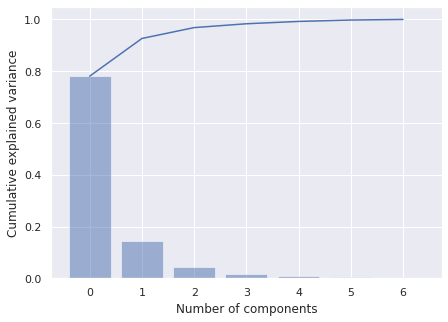

In [23]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [24]:
pca.components_

array([[-0.40924816,  0.38765875, -0.42306579,  0.41975694,  0.39007221,
        -0.41637981,  0.03908461],
       [-0.03127681, -0.08842864, -0.05261968, -0.02395359,  0.15136848,
         0.02736154, -0.98193608],
       [-0.04167985, -0.72758677, -0.04757238,  0.02164315,  0.65743574,
         0.06576944,  0.17205044],
       [ 0.88413378,  0.21802234, -0.09076176,  0.2841246 ,  0.28519275,
        -0.02079315, -0.00647903],
       [-0.13727953,  0.29747662, -0.29575152, -0.03122652,  0.19991587,
         0.8728218 ,  0.0493324 ],
       [-0.07533843, -0.28298804,  0.10274032,  0.85152966, -0.3498311 ,
         0.23259502, -0.04584005],
       [ 0.15357868, -0.31050001, -0.84244949, -0.12632202, -0.38603944,
        -0.07213106,  0.00977773]])

In [25]:
pca.components_.T

array([[-0.40924816, -0.03127681, -0.04167985,  0.88413378, -0.13727953,
        -0.07533843,  0.15357868],
       [ 0.38765875, -0.08842864, -0.72758677,  0.21802234,  0.29747662,
        -0.28298804, -0.31050001],
       [-0.42306579, -0.05261968, -0.04757238, -0.09076176, -0.29575152,
         0.10274032, -0.84244949],
       [ 0.41975694, -0.02395359,  0.02164315,  0.2841246 , -0.03122652,
         0.85152966, -0.12632202],
       [ 0.39007221,  0.15136848,  0.65743574,  0.28519275,  0.19991587,
        -0.3498311 , -0.38603944],
       [-0.41637981,  0.02736154,  0.06576944, -0.02079315,  0.8728218 ,
         0.23259502, -0.07213106],
       [ 0.03908461, -0.98193608,  0.17205044, -0.00647903,  0.0493324 ,
        -0.04584005,  0.00977773]])

In [26]:
Lambda = pca.explained_variance_
print('', Lambda)

 [5.47200243 1.02022803 0.29392599 0.10392597 0.06313663 0.03782596
 0.01596199]


**Biplot**

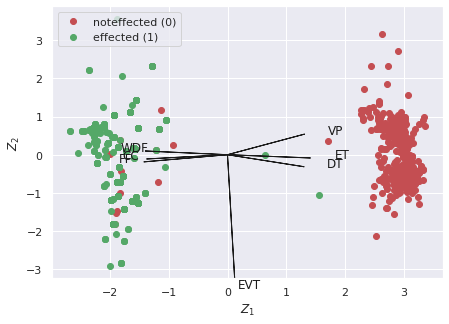

In [27]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.3, A2[i]*max(Z2)*1.0,variables[i], color='k')

plt.scatter(Z[idx_noteffected,0], Z[idx_noteffected,1], c='r', label='noteffected (0)')
plt.scatter(Z[idx_effected,0], Z[idx_effected,1], c='g', label='effected (1)')
plt.legend(loc='upper left')

##**Using PCA Library**

In [28]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=fefca38386c0d70cf5c4df451bab02d2d02d3894958dfd4cbd87b2bd28bde6e3
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [29]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [30]:
out['PC']

PC1       PC2       PC3
0    0.644989 -0.012137  0.380944
1   -1.926581  1.042420 -0.265737
2   -1.926581  1.042420 -0.265737
3   -1.926581  1.042420 -0.265737
4   -1.926581  1.042420 -0.265737
..        ...       ...       ...
995 -1.125427  1.179748  0.120226
996 -1.191396 -0.703779  0.142397
997 -1.832949 -1.016251  0.047791
998 -1.892576 -1.523548  0.129832
999 -1.812690 -0.423558 -0.050441

[1000 rows x 3 columns]

**Scatter plot**

[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9658540ad0>)

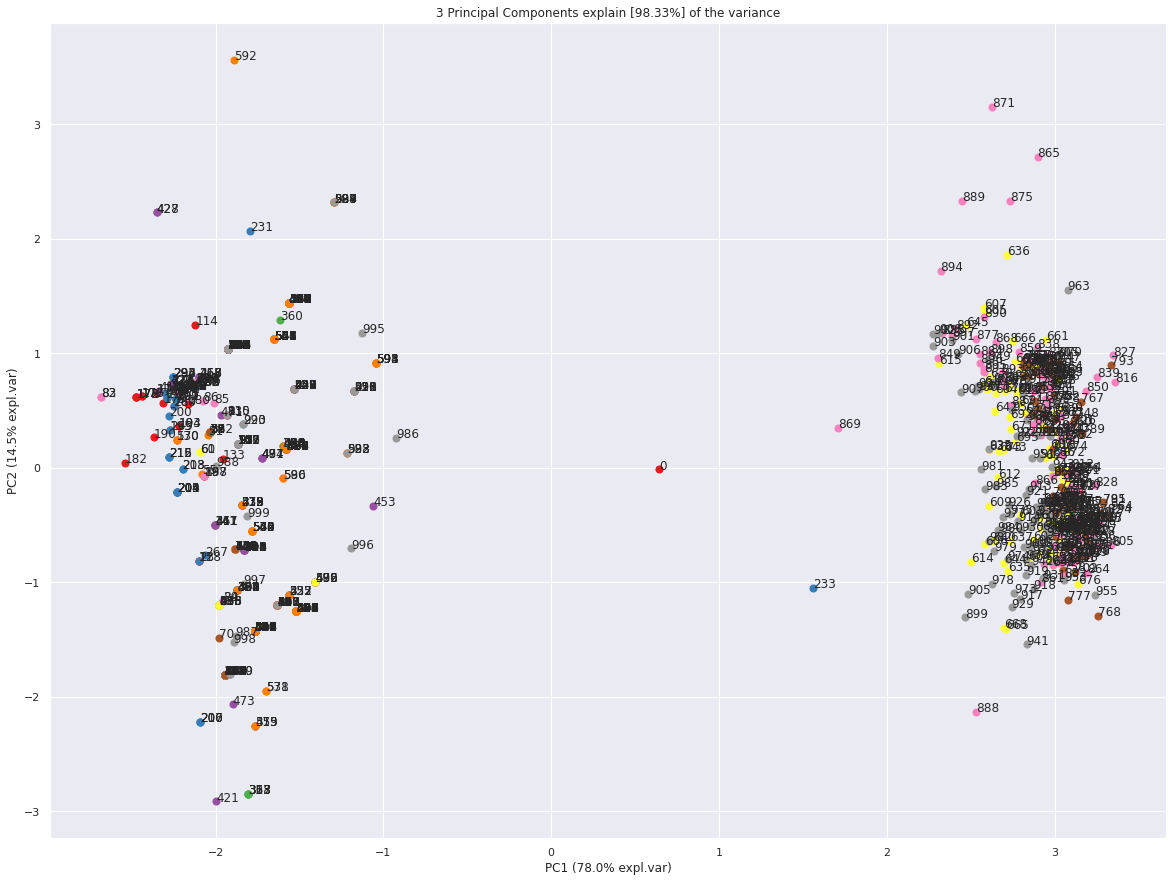

In [31]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [32]:
A = out['loadings'].T

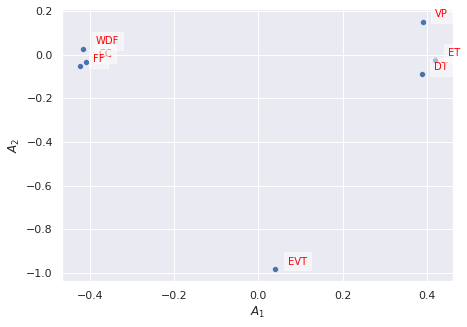

In [33]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.03,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='white',alpha=0.5))

**Scree Plot**

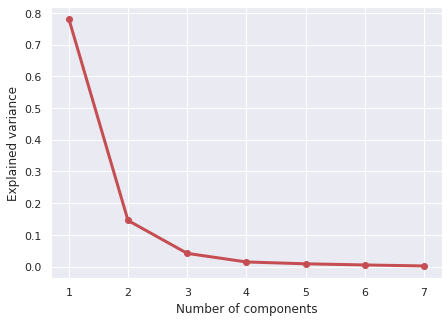

In [34]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

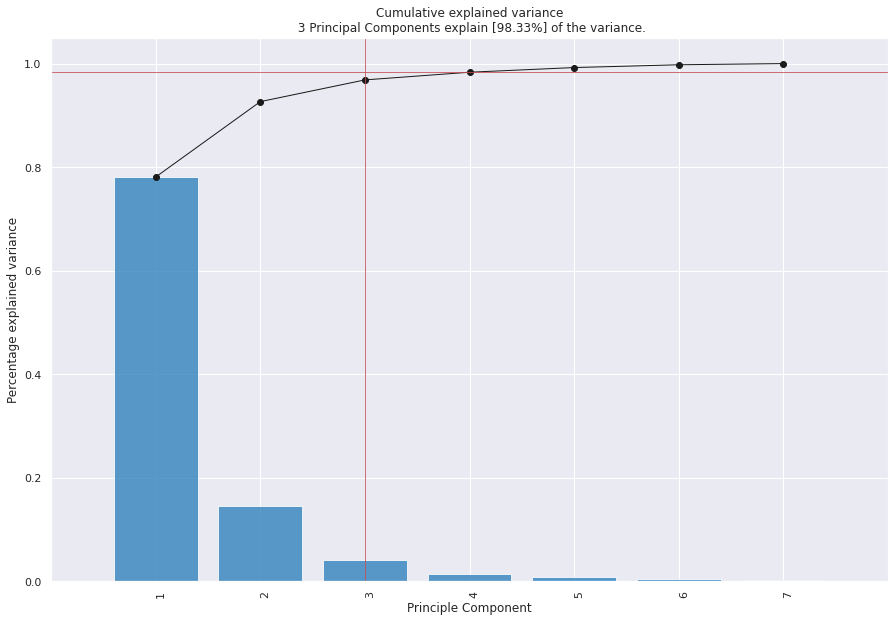

<Figure size 504x360 with 0 Axes>

In [35]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


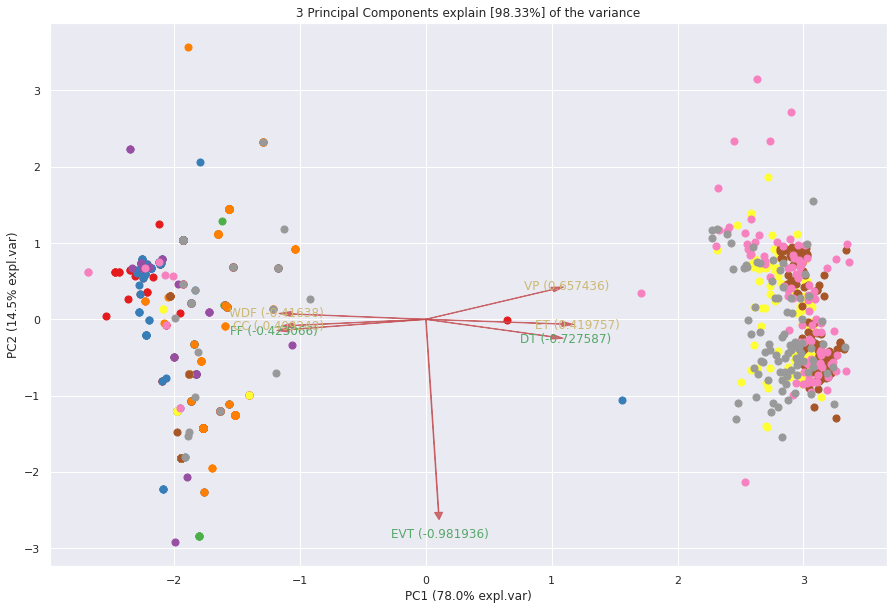

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9660a1f410>)

In [36]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


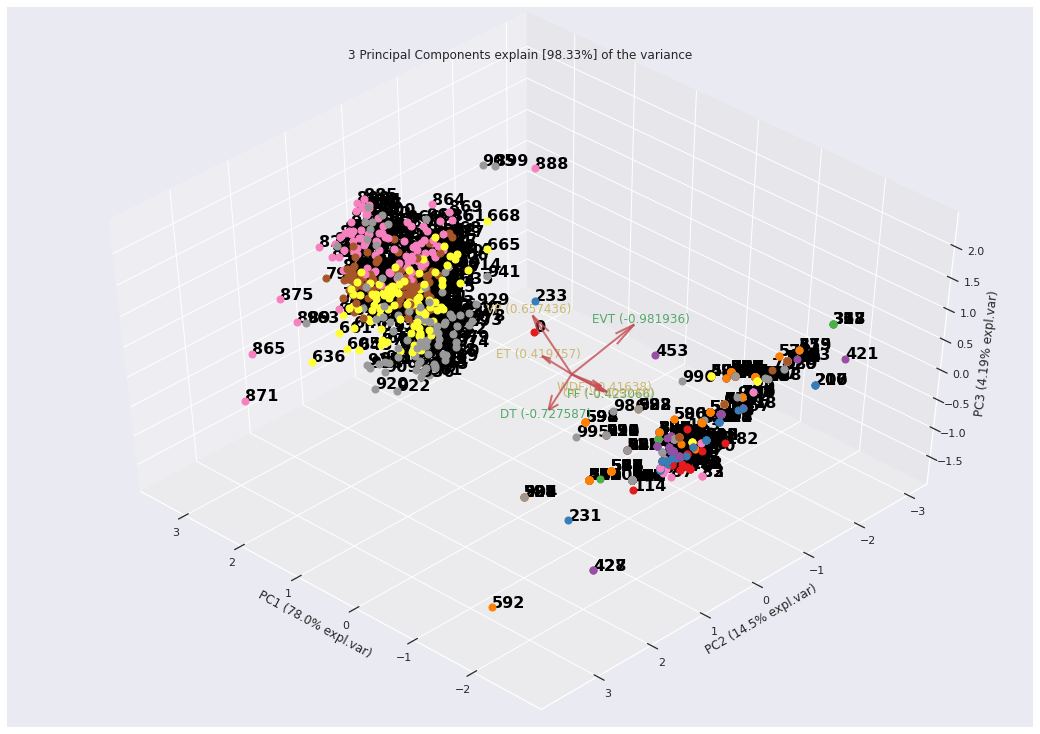

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f965796fed0>)

In [37]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

In [38]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [39]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [42]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (900, 8)
Unseen Data For Predictions: (100, 8)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [41]:
from pycaret.classification import *
clf = setup(data=data, target='LUMPY', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             LUMPY
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (900, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (629, 7)
12                    Transformed Test Set          (271, 7)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              484c
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'effected' or 'not effected') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : not effected, 1 : effected) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (900, 8) means 900 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (900, 8) is transformed into (629, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 271 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [43]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
qda       Quadratic Discriminant Analysis    0.9904  0.9922  0.9975  0.9877   
dt               Decision Tree Classifier    0.9888  0.9875  0.9924  0.9901   
ada                  Ada Boost Classifier    0.9888  0.9944  0.9974  0.9851   
gbc          Gradient Boosting Classifier    0.9888  0.9965  0.9950  0.9877   
et                 Extra Trees Classifier    0.9888  0.9931  0.9949  0.9876   
lr                    Logistic Regression    0.9857  0.9948  0.9949  0.9827   
ridge                    Ridge Classifier    0.9857  0.0000  0.9949  0.9827   
lda          Linear Discriminant Analysis    0.9857  0.9826  0.9949  0.9827   
lightgbm  Light Gradient Boosting Machine    0.9857  0.9984  0.9924  0.9851   
knn                K Neighbors Classifier    0.9841  0.9841  0.9924  0.9827   
nb                            Naive Bayes    0.9841  0.9893  0.9924  0.9827   
svm                   SVM - Linear Kernel    0.9841  0.0000  0.9975  0.9781   
rf               Random Forest Classifier    0.9841  0.9942  0.9924  0.9827   
dummy                    Dummy Classifier    0.6264  0.5000  1.0000  0.6264   

              F1   Kappa     MCC  TT (Sec)  
qda       0.9925  0.9793  0.9799     0.015  
dt        0.9911  0.9761  0.9765     0.015  
ada       0.9912  0.9760  0.9764     0.106  
gbc       0.9912  0.9760  0.9767     0.103  
et        0.9912  0.9760  0.9764     0.462  
lr        0.9887  0.9692  0.9698     0.359  
ridge     0.9887  0.9692  0.9698     0.016  
lda       0.9887  0.9692  0.9698     0.015  
lightgbm  0.9886  0.9693  0.9699     0.082  
knn       0.9874  0.9658  0.9666     0.118  
nb        0.9874  0.9658  0.9666     0.016  
svm       0.9876  0.9655  0.9664     0.015  
rf        0.9874  0.9658  0.9666     0.474  
dummy     0.7703  0.0000  0.0000     0.012

In [44]:
best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [45]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9841  0.9872  0.9744  1.0000  0.9870  0.9666  0.9672
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9841  0.9786  1.0000  0.9750  0.9873  0.9661  0.9666
4       0.9683  0.9663  0.9744  0.9744  0.9744  0.9327  0.9327
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9841  0.9875  0.9750  1.0000  0.9873  0.9661  0.9666
9       0.9677  0.9554  1.0000  0.9512  0.9750  0.9296  0.9319
Mean    0.9888  0.9875  0.9924  0.9901  0.9911  0.9761  0.9765
SD      0.0125  0.0153  0.0117  0.0164  0.0099  0.0268  0.0264

In [46]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [47]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9841  0.9792     1.0  0.9750  0.9873  0.9661  0.9666
1       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
3       0.9683  0.9583     1.0  0.9512  0.9750  0.9316  0.9338
4       0.9683  0.9583     1.0  0.9512  0.9750  0.9316  0.9338
5       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
9       0.9677  0.9565     1.0  0.9512  0.9750  0.9296  0.9319
Mean    0.9888  0.9852     1.0  0.9829  0.9912  0.9759  0.9766
SD      0.0144  0.0190     0.0  0.0220  0.0113  0.0311  0.0301

In [48]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [50]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [51]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [52]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9841  0.9776  1.0000  0.9750  0.9873  0.9661  0.9666
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9683  0.9770  1.0000  0.9512  0.9750  0.9316  0.9338
4       0.9524  0.9444  0.9744  0.9500  0.9620  0.8982  0.8987
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9683  0.9875  0.9500  1.0000  0.9744  0.9328  0.9349
9       0.9677  0.9543  1.0000  0.9512  0.9750  0.9296  0.9319
Mean    0.9841  0.9841  0.9924  0.9827  0.9874  0.9658  0.9666
SD      0.0174  0.0196  0.0161  0.0222  0.0138  0.0374  0.0367

**Tune K Neighbors Model**

In [53]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9841  0.9760  1.0000  0.9750  0.9873  0.9661  0.9666
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9683  0.9754  1.0000  0.9512  0.9750  0.9316  0.9338
4       0.9524  0.9610  0.9744  0.9500  0.9620  0.8982  0.8987
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9841  1.0000  0.9750  1.0000  0.9873  0.9661  0.9666
9       0.9677  0.9760  1.0000  0.9512  0.9750  0.9296  0.9319
Mean    0.9857  0.9888  0.9949  0.9827  0.9887  0.9692  0.9698
SD      0.0166  0.0143  0.0101  0.0222  0.0131  0.0358  0.0352

**Evaluate K Neighbors Model**

In [54]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [55]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9841  0.9989  1.0000  0.9750  0.9873  0.9661  0.9666
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9683  0.9899  1.0000  0.9512  0.9750  0.9316  0.9338
4       0.9524  0.9915  0.9744  0.9500  0.9620  0.8982  0.8987
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9841  0.9772  0.9750  1.0000  0.9873  0.9661  0.9666
9       0.9677  0.9905  1.0000  0.9512  0.9750  0.9296  0.9319
Mean    0.9857  0.9948  0.9949  0.9827  0.9887  0.9692  0.9698
SD      0.0166  0.0072  0.0101  0.0222  0.0131  0.0358  0.0352

**Tune Logistic Regression Model**

In [56]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9841  0.9989  1.0000  0.9750  0.9873  0.9661  0.9666
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9683  0.9888  1.0000  0.9512  0.9750  0.9316  0.9338
4       0.9524  0.9925  0.9744  0.9500  0.9620  0.8982  0.8987
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9841  0.9826  0.9750  1.0000  0.9873  0.9661  0.9666
9       0.9677  0.9894  1.0000  0.9512  0.9750  0.9296  0.9319
Mean    0.9857  0.9952  0.9949  0.9827  0.9887  0.9692  0.9698
SD      0.0166  0.0061  0.0101  0.0222  0.0131  0.0358  0.0352

**Evaluate Logistic Regression Model**

In [57]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [58]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9841  1.0000  1.0000  0.9750  0.9873  0.9661  0.9666
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9683  0.9920  1.0000  0.9512  0.9750  0.9316  0.9338
4       0.9524  0.9754  0.9744  0.9500  0.9620  0.8982  0.8987
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9683  1.0000  0.9500  1.0000  0.9744  0.9328  0.9349
9       0.9677  0.9749  1.0000  0.9512  0.9750  0.9296  0.9319
Mean    0.9841  0.9942  0.9924  0.9827  0.9874  0.9658  0.9666
SD      0.0174  0.0098  0.0161  0.0222  0.0138  0.0374  0.0367

**Tune Random Forest Model**

In [59]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9841  1.0000  1.0000  0.9750  0.9873  0.9661  0.9666
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9683  0.9792  1.0000  0.9512  0.9750  0.9316  0.9338
4       0.9524  0.9573  0.9744  0.9500  0.9620  0.8982  0.8987
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9841  1.0000  0.9750  1.0000  0.9873  0.9661  0.9666
9       0.9677  0.9755  1.0000  0.9512  0.9750  0.9296  0.9319
Mean    0.9857  0.9912  0.9949  0.9827  0.9887  0.9692  0.9698
SD      0.0166  0.0144  0.0101  0.0222  0.0131  0.0358  0.0352

**Evaluate Random Forest Model**

In [60]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [61]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9841  0.9989  1.0000  0.9750  0.9873  0.9661  0.9666
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9683  0.9973  1.0000  0.9512  0.9750  0.9316  0.9338
4       0.9683  0.9562  1.0000  0.9512  0.9750  0.9316  0.9338
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9841  1.0000  0.9750  1.0000  0.9873  0.9661  0.9666
9       0.9677  0.9771  1.0000  0.9512  0.9750  0.9296  0.9319
Mean    0.9873  0.9930  0.9975  0.9829  0.9900  0.9725  0.9733
SD      0.0139  0.0140  0.0075  0.0220  0.0109  0.0301  0.0291

In [62]:
tuned_best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [63]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [64]:
clf_pca = setup(data=data, target='LUMPY', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             LUMPY
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (900, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (629, 3)
12                    Transformed Test Set          (271, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f31f
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [65]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.9873  0.9856  0.9975  0.9829   
lr                    Logistic Regression    0.9857  0.9928  0.9949  0.9827   
nb                            Naive Bayes    0.9857  0.9936  0.9949  0.9827   
svm                   SVM - Linear Kernel    0.9857  0.0000  0.9949  0.9827   
ridge                    Ridge Classifier    0.9857  0.0000  0.9949  0.9827   
rf               Random Forest Classifier    0.9857  0.9904  0.9949  0.9827   
ada                  Ada Boost Classifier    0.9857  0.9901  0.9950  0.9829   
lda          Linear Discriminant Analysis    0.9857  0.9851  0.9949  0.9827   
et                 Extra Trees Classifier    0.9857  0.9907  0.9949  0.9827   
lightgbm  Light Gradient Boosting Machine    0.9857  0.9931  0.9949  0.9827   
qda       Quadratic Discriminant Analysis    0.9841  0.9931  0.9924  0.9827   
gbc          Gradient Boosting Classifier    0.9841  0.9890  0.9924  0.9827   
dt               Decision Tree Classifier    0.9825  0.9800  0.9899  0.9827   
dummy                    Dummy Classifier    0.6264  0.5000  1.0000  0.6264   

              F1   Kappa     MCC  TT (Sec)  
knn       0.9900  0.9725  0.9733     0.116  
lr        0.9887  0.9692  0.9698     0.021  
nb        0.9887  0.9692  0.9698     0.015  
svm       0.9887  0.9692  0.9698     0.017  
ridge     0.9887  0.9692  0.9698     0.016  
rf        0.9887  0.9692  0.9698     0.466  
ada       0.9887  0.9691  0.9699     0.107  
lda       0.9887  0.9692  0.9698     0.017  
et        0.9887  0.9692  0.9698     0.465  
lightgbm  0.9887  0.9692  0.9698     0.044  
qda       0.9874  0.9658  0.9666     0.014  
gbc       0.9874  0.9658  0.9664     0.094  
dt        0.9861  0.9624  0.9631     0.016  
dummy     0.7703  0.0000  0.0000     0.011

In [66]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model**

In [67]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9841  0.9781  1.0000  0.9750  0.9873  0.9661  0.9666
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9683  0.9776  1.0000  0.9512  0.9750  0.9316  0.9338
4       0.9683  0.9573  1.0000  0.9512  0.9750  0.9316  0.9338
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9841  0.9875  0.9750  1.0000  0.9873  0.9661  0.9666
9       0.9677  0.9565  1.0000  0.9512  0.9750  0.9296  0.9319
Mean    0.9873  0.9857  0.9975  0.9829  0.9900  0.9725  0.9733
SD      0.0139  0.0168  0.0075  0.0220  0.0109  0.0301  0.0291

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [68]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [69]:
!pip install shap

     |████████████████████████████████| 564 kB 24.7 MB/s 


In [70]:
import shap

In [71]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9841  0.9979  1.0000  0.9750  0.9873  0.9661  0.9666
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9683  0.9888  1.0000  0.9512  0.9750  0.9316  0.9338
4       0.9524  0.9498  0.9744  0.9500  0.9620  0.8982  0.8987
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9841  0.9989  0.9750  1.0000  0.9873  0.9661  0.9666
9       0.9677  0.9688  1.0000  0.9512  0.9750  0.9296  0.9319
Mean    0.9857  0.9904  0.9949  0.9827  0.9887  0.9692  0.9698
SD      0.0166  0.0165  0.0101  0.0222  0.0131  0.0358  0.0352

In [72]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9841  0.9792  1.0000  0.9750  0.9873  0.9661  0.9666
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9683  0.9573  1.0000  0.9512  0.9750  0.9316  0.9338
4       0.9683  0.9573  1.0000  0.9512  0.9750  0.9316  0.9338
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9841  0.9967  0.9750  1.0000  0.9873  0.9661  0.9666
9       0.9677  0.9554  1.0000  0.9512  0.9750  0.9296  0.9319
Mean    0.9873  0.9846  0.9975  0.9829  0.9900  0.9725  0.9733
SD      0.0139  0.0193  0.0075  0.0220  0.0109  0.0301  0.0291

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

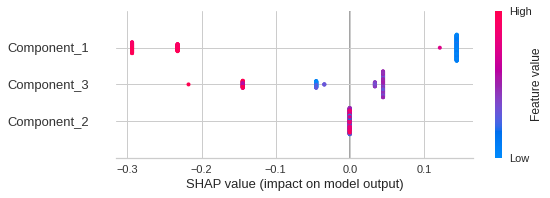

In [73]:
interpret_model(tuned_rf_pca, plot='summary')

In [74]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [75]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [76]:
interpret_model(tuned_rf_pca, plot='reason')